In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil import parser as ps
import datetime as dt
from workalendar.usa import UnitedStates
from workalendar.asia import SouthKorea, China, Japan
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as smd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats

In [76]:
df=pd.read_pickle('./df_with_features.zip',compression = 'zip')
df_features = df.drop(columns = ['release_date','release_year','game','console','publisher'])

# Selects first column on left as the targeted and all columns on right as features
def patsy_string_from_df(df_features):
    patsy_string = df_features.columns[0] + " ~ "
    print('Predicted variable: ' + df_features.columns[0])
    for title in df_features.columns[1:]:
        patsy_string += title + " + "
    #remove last plus and spaces from string
    patsy_string=patsy_string[:-3]
    print(patsy_string)
    return patsy_string

#Uses above patsy string to make OLS model
def sm_OLS_model(df_features):
    y, X = patsy.dmatrices(patsy_string_from_df(df_features), data=df_features, return_type="dataframe")
    model = sm.OLS(y, X)
    # Fit your model to your training set
    fit = model.fit()

    # Print summary statistics of the model's performance
    return fit

# It looks like release date proximity to holidays doesn't really have an impact on total sales. Let's drop those
df_features.drop(columns = ['near_sk_holiday','near_jp_holiday','near_cn_holiday'],inplace = True)
patsy_string_from_df(df_features)

# Drop outliers above 95%
outlier_cutoff = np.percentile(yval,95)
df_features =\
df_features.loc[df_features['total_shipped_in_mil'] < outlier_cutoff]

fit1=sm_OLS_model(df_features)
fit1.summary()

Predicted variable: total_shipped_in_mil
total_shipped_in_mil ~ average_rating + near_us_holiday + years_since_release + top_10_publisher
Predicted variable: total_shipped_in_mil
total_shipped_in_mil ~ average_rating + near_us_holiday + years_since_release + top_10_publisher


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     total_shipped_in_mil   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                 -0.003
Method:                   Least Squares   F-statistic:                    0.7017
Date:                  Thu, 18 Apr 2019   Prob (F-statistic):              0.591
Time:                          10:50:33   Log-Likelihood:                 1120.7
No. Observations:                   395   AIC:                            -2231.
Df Residuals:                       390   BIC:                            -2211.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1167      0.004     31.206      0.000       0.109       0.124
near_us_holiday[T.True]     -0.0004      0.003     -0.104      0.917      -0.007       0.006
top_10_publisher[T.True]     0.0008      0.002      0.470      0.639      -0.003       0.004
average_rating            2.693e-05      0.000      0.054      0.957      -0.001       0.001
years_since_release          0.0002      0.000      1.609      0.108   -5.21e-05       0.001
==============================================================================
Omnibus:                      750.763   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.280
Skew:                           0.051   Prob(JB):                     4.39e-07
Kurtosis:                       1.670   Cond. No.                         74.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lambda: 0.37412312332423053


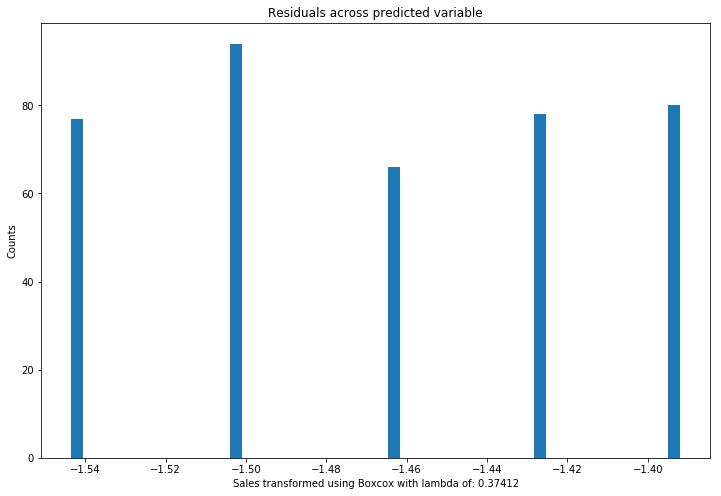

In [78]:
# Calculate scaling power using lambda
lamb=stats.boxcox_normmax(df_features['total_shipped_in_mil'],\
                          brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(df_features['total_shipped_in_mil'],lamb)-1)/lamb
#plt.hist(df_features['total_shipped_in_mil'])
plt.figure(figsize=(12,8))
plt.xlabel("Sales transformed using Boxcox with lambda of: " + str(lamb.round(5)))
plt.ylabel("Counts")
plt.title('Residuals across predicted variable');
plt.hist(y_t,bins = 50);

In [79]:

df_features

,total_shipped_in_mil,average_rating,near_us_holiday,years_since_release,top_10_publisher
12973,0.10,8.00,False,8.978082,False
13019,0.10,5.70,False,8.920548,False
13103,0.10,3.50,False,8.882192,False
13123,0.10,6.80,False,8.863014,False
9572,0.10,8.20,False,10.854795,False
9350,0.10,6.40,False,11.068493,False
12822,0.10,8.60,False,9.106849,False
8065,0.10,6.20,False,11.890411,False
18976,0.10,7.70,False,2.495890,False
16293,0.10,8.00,False,6.082192,False


In [80]:
# BOXCOX
y = y_t

# Can't use log'd data because poisson requires integer predictions?
#y = df_features.iloc[:,-1].values
X = df_features.iloc[:,:-1].values
y.head()

12973   -1.543479
13019   -1.543479
13103   -1.543479
13123   -1.543479
9572    -1.543479
Name: total_shipped_in_mil, dtype: float64

[-0.91269934 -1.23130172 -1.53616118 ... -0.54535414 -0.8720791
 -0.94339813]
1.7977667669783897
1.6509482286084767
RMSE / max_val:  12.8412
MAE / max_val:  11.7925


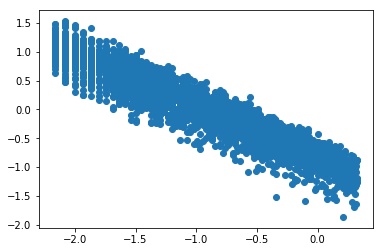

In [81]:

# Calculate root mean squared error
def transform_resids_back_to_correct_units(residual,lamb):
    return (lamb * residual + 1) ** (1/lamb)
    

ypred = scaled_model.predict()
print(ypred)
yval = scaled_features['total_shipped_in_mil_boxcox']
residuals_squared = list()
residuals_abs = list()
residuals = list()
for i in range(0,len(yval)):
    residuals.append(ypred[i]-yval[i])
    residuals_squared.append((ypred[i]-yval[i])**2)
    residuals_abs.append(abs(ypred[i] - yval [i]))

rmse = transform_resids_back_to_correct_units(np.sqrt(sum(residuals_squared)/len(yval)),lamb)
mae = transform_resids_back_to_correct_units(sum(residuals_abs)/len(yval),lamb)

print(rmse)
print(mae) 


max_val = df_features['total_shipped_in_mil'].max()
print("RMSE / max_val: " ,(rmse/max_val).round(4))
print("MAE / max_val: ",(mae/max_val).round(4))
plt.scatter(yval,residuals)
    
